In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

RESULTS_PATH = Path("/Users/jessbreda/Desktop/github/ca-sdoh/code/jess/results")
pallette = ["sandybrown", "lightseagreen"]

sns.set_context("talk")

In [5]:
conditions = ["hf", "copd", "pn"]

dfs = []
for cond in conditions:
    dfs.append(pd.read_csv(RESULTS_PATH / f"{cond}_models_results.csv"))

results = pd.concat(dfs, ignore_index=True)

Text(0.5, 1.0, 'Model Error by Features, Type')

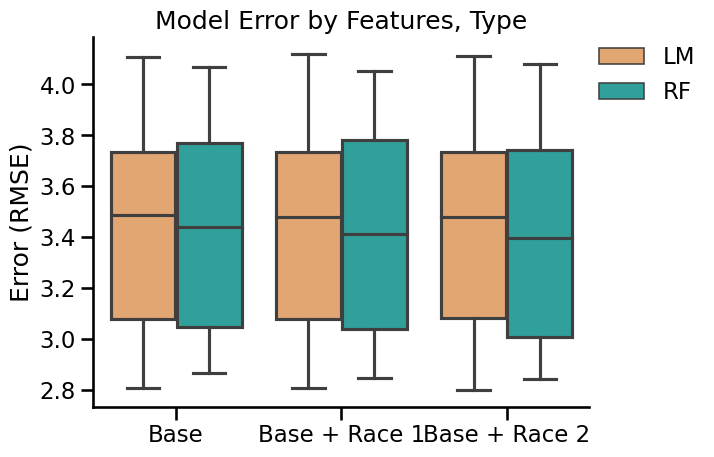

In [33]:
sns.boxplot(data=results, x="model_name", y="rmse", hue="model_type", palette=pallette)
sns.despine()
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, frameon=False, borderaxespad=0.0)

plt.ylabel("Error (RMSE)")
plt.xlabel("")
plt.title("Model Error by Features, Type")

Text(0.5, 1.0, 'Model Error by Features, Type')

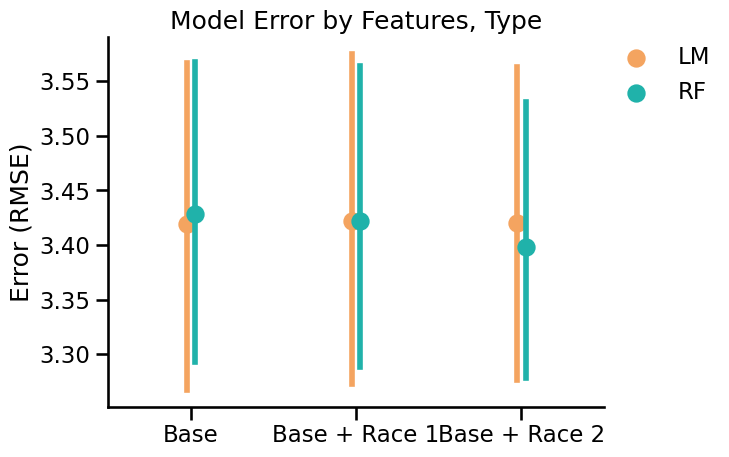

In [36]:
sns.pointplot(
    data=results,
    x="model_name",
    y="rmse",
    hue="model_type",
    palette=pallette,
    dodge=True,
    join=False,
)
sns.despine()
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, frameon=False, borderaxespad=0.0)

plt.ylabel("Error (RMSE)")
plt.xlabel("")
plt.title("Model Error by Features, Type")

Text(0.5, 1.0, 'Model Fit by Features, Type')

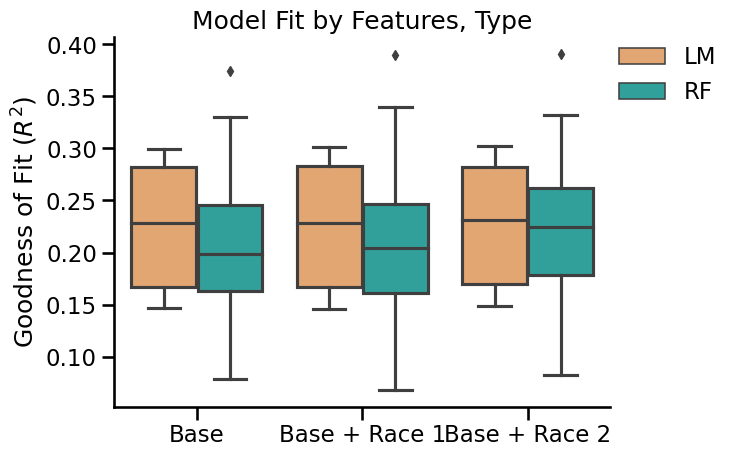

In [34]:
sns.boxplot(data=results, x="model_name", y="r2", hue="model_type", palette=pallette)
sns.despine()
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, frameon=False, borderaxespad=0.0)

plt.ylabel("Goodness of Fit ($R^2$)")
plt.xlabel("")
plt.title("Model Fit by Features, Type")